In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [2]:
data = pd.read_csv('.\Data\house-data.csv')

In [ ]:
data.info()

In [3]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [19]:
data.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10689,5412100240,20141022T000000,340000.000,4,2.500,2550,7555,2.000,0,0,...,8,2550,0,2001,0,98001,47.261,-122.290,2550,6800
7493,2655500235,20150410T000000,1605000.000,4,3.500,3920,19088,1.000,0,1,...,10,2240,1680,2005,0,98040,47.576,-122.214,3800,13749
16764,1974200020,20150220T000000,450000.000,4,1.750,2190,9752,1.000,0,0,...,8,2190,0,1964,0,98034,47.711,-122.239,2040,9964
16690,9492800020,20140930T000000,425000.000,3,1.750,1960,43332,1.000,0,0,...,7,1400,560,1982,0,98077,47.739,-122.048,2010,44431
6288,8001210170,20140822T000000,275000.000,4,2.750,2060,7350,1.000,0,0,...,7,1210,850,1978,0,98001,47.342,-122.275,1940,7420


In [20]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [21]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [23]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


Fra beskrivelsen kan vi udlede, at:<br>

Gennemsnitlig pris: Gennemsnittet af priserne på solgte huse i King County, USA er $540,088.<br>

Maksimal pris: Det højeste beløb for et hus solgt i King County, USA er $7,700,000.<br>

Gennemsnitligt antal soveværelser og badeværelser: Gennemsnittet for antallet af soveværelser pr. hus er 3, og gennemsnittet for antallet af badeværelser pr. soveværelse er 2. Der er dog en række usædvanlige observationer, da det maksimale antal soveværelser for et hus er 33, og der er også nogle huse med 0 soveværelser.<br>

Gennemsnitligt areal: Gennemsnittet for arealet af husene er 2079 kvadratfod, men der er en betydelig variation, da det maksimale areal er 13540 kvadratfod.

<Axes: >

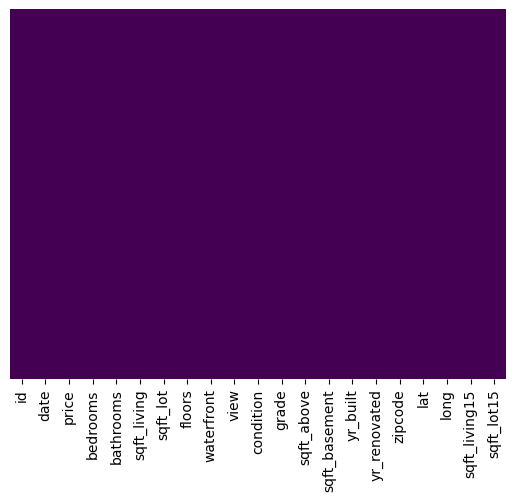

In [28]:
# dette er en effektiv måde at identificere manglende data på, da det giver et visuelt billede af, hvor manglende værdier er placeret i datasættet.
sns.heatmap(data.isnull(), yticklabels= False, cbar=False, cmap= 'viridis')


In [25]:
# Det giver dig en idé om, hvor mange huse der har et bestemt antal soveværelser.
data['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [29]:
# Det giver dig en idé om, hvor mange huse der har udsigt til vand.
data['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [30]:
# Det giver dig en idé om, hvor mange huse der har haft visninger.
data['view'].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

In [31]:
# Hver værdi i 'grade repræsenterer husets byggekvalitet og design ifølge King County's skala. En højere 'grade' indikerer normalt et hus af højere kvalitet og design.
data['grade'].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

<Axes: xlabel='bedrooms', ylabel='count'>

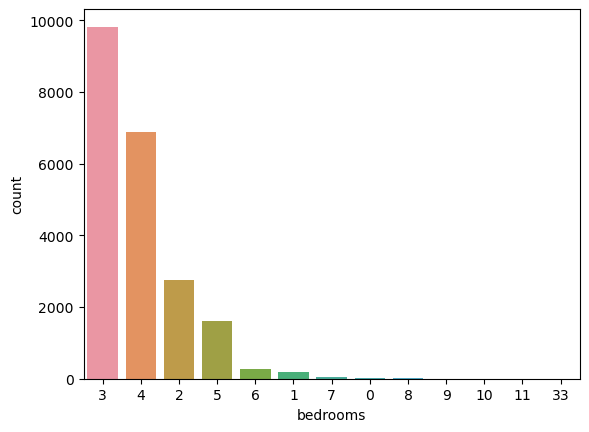

In [39]:
# oprette et stolpediagram af antallet af huse baseret på antallet af soveværelser.
sns.countplot(x='bedrooms', data=data, order=data['bedrooms'].value_counts().index)

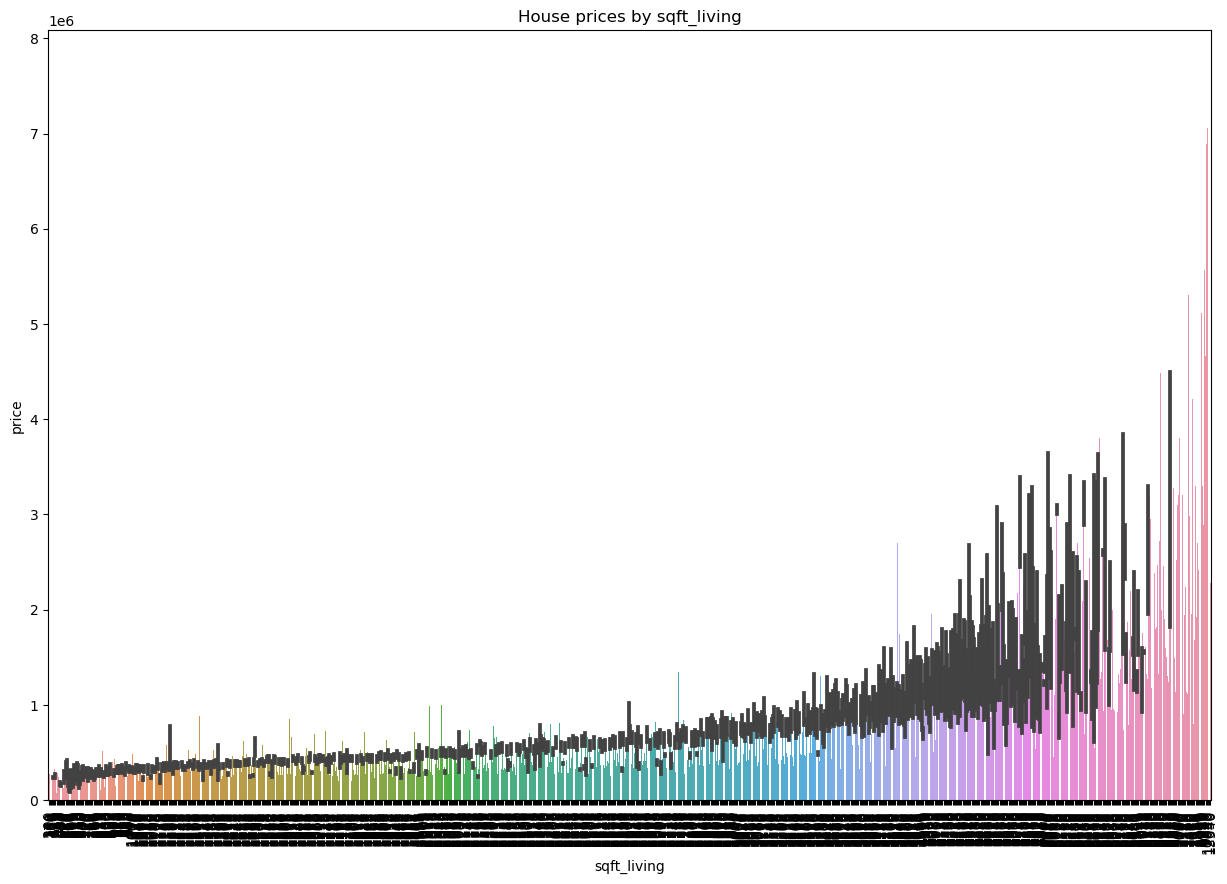

In [41]:
#Dette vil oprette et søjlediagram, der viser huspriser i forhold til boligareal
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
plt.title('House prices by sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('House Prices')
sns.barplot(x='sqft_living', y='price', df=data, ax=axes)
plt.xticks(rotation=90)  # Rotér x-akseniketterne med 90 grader
plt.show()

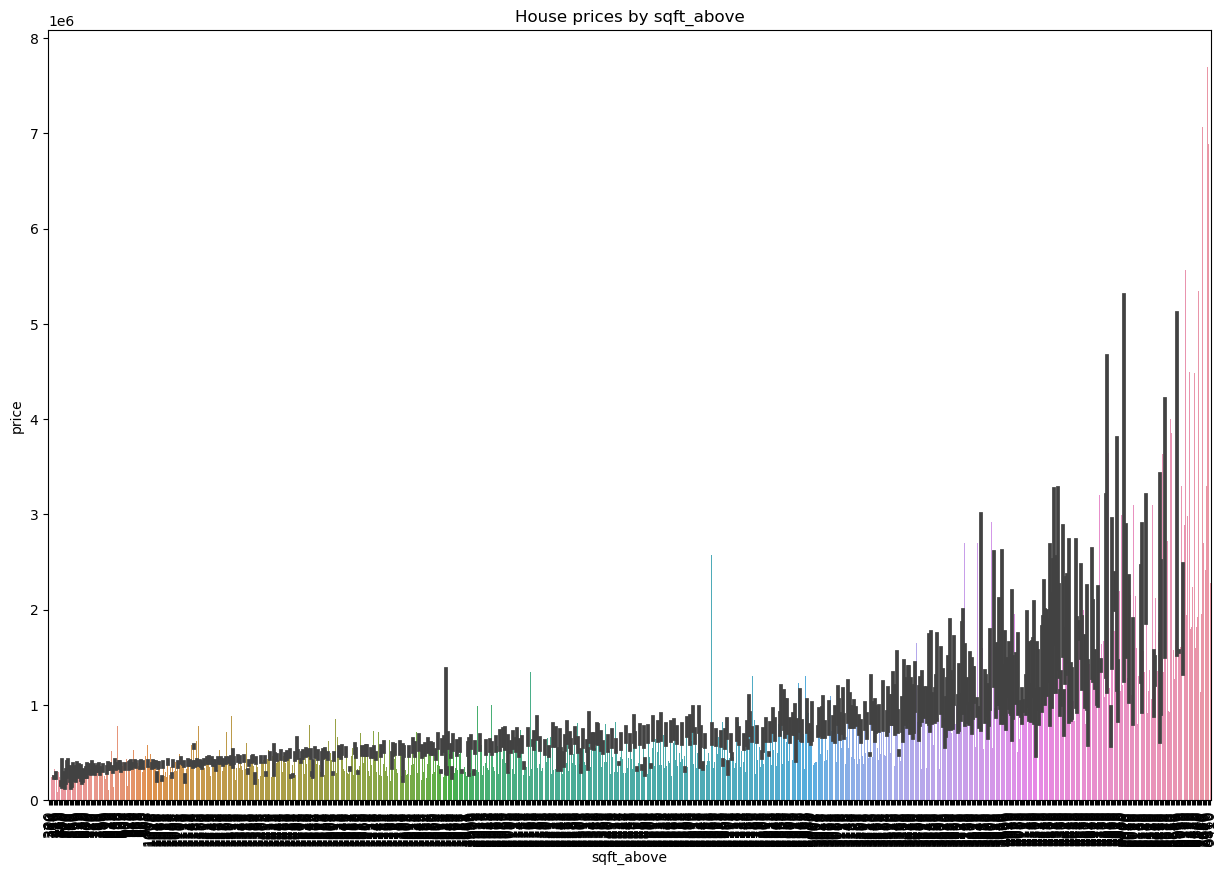

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
plt.title('House prices by sqft_above')
plt.xlabel('sqft_above')
plt.ylabel('House Prices')
sns.barplot(x='sqft_above', y='price', df=data, ax=axes)
plt.xticks(rotation=90)  # Rotér x-akseniketterne med 90 grader
plt.show()

(array([2.844e+03, 9.332e+03, 6.074e+03, 2.356e+03, 7.250e+02, 1.740e+02,
        6.300e+01, 2.500e+01, 1.300e+01, 1.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00]),
 array([  290.        ,  1173.33333333,  2056.66666667,  2940.        ,
         3823.33333333,  4706.66666667,  5590.        ,  6473.33333333,
         7356.66666667,  8240.        ,  9123.33333333, 10006.66666667,
        10890.        , 11773.33333333, 12656.66666667, 13540.        ]),
 <BarContainer object of 15 artists>)

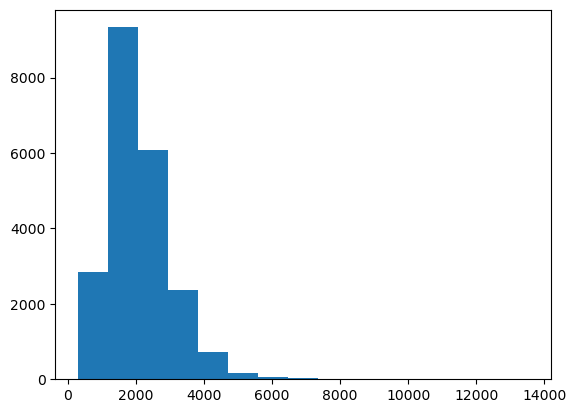

In [63]:
plt.hist('sqft_living', data = data, bins = 15)

C:\Users\denso\AppData\Local\Temp\ipykernel_22864\661413551.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sqft_living'], hist=True, kde=True, rug=False, label='sqft_living', norm_hist=True)


<Axes: xlabel='sqft_living', ylabel='Density'>

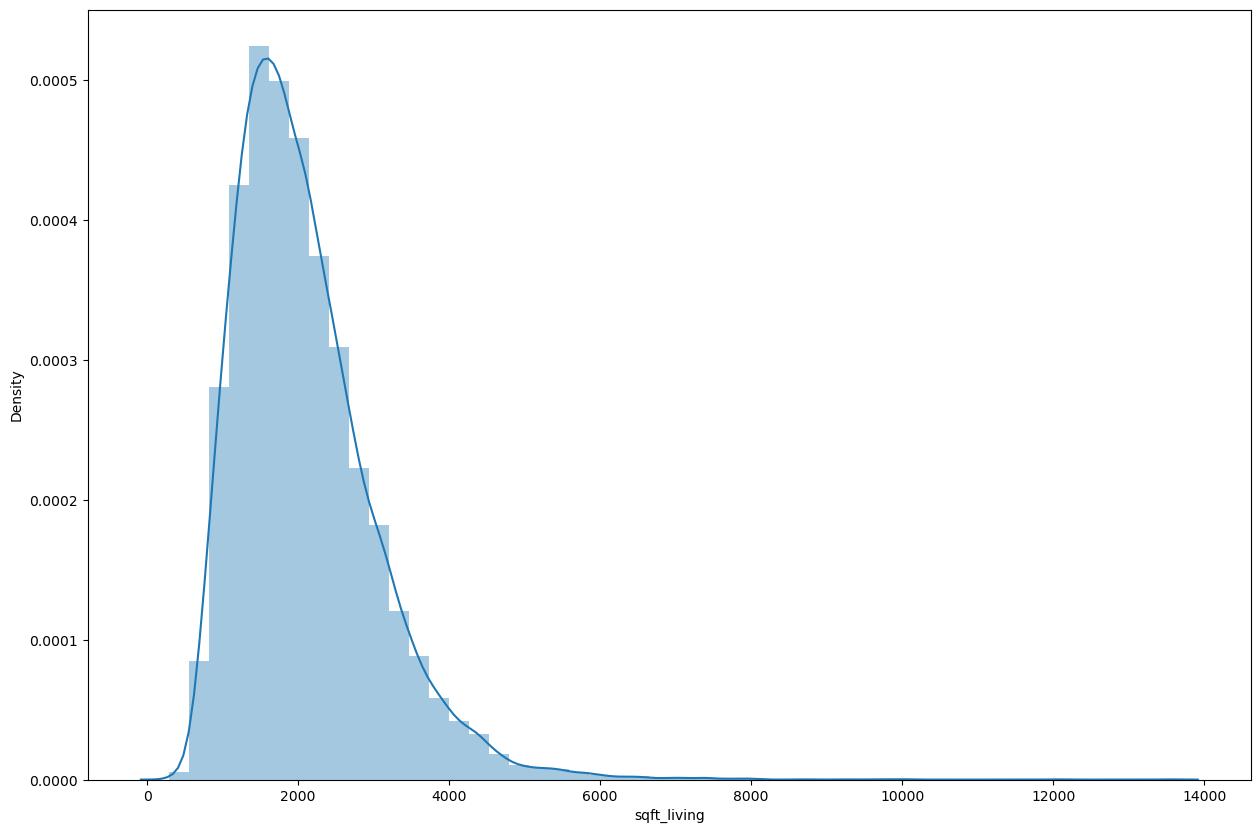

In [53]:

#Dette plot viser en fordelingsplot for sqft_living-attributtet i datasætte
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
sns.distplot(data['sqft_living'], hist=True, kde=True, rug=False, label='sqft_living', norm_hist=True)

C:\Users\denso\AppData\Local\Temp\ipykernel_22864\661413551.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sqft_living'], hist=True, kde=True, rug=False, label='sqft_living', norm_hist=True)


<Axes: xlabel='sqft_living', ylabel='Density'>

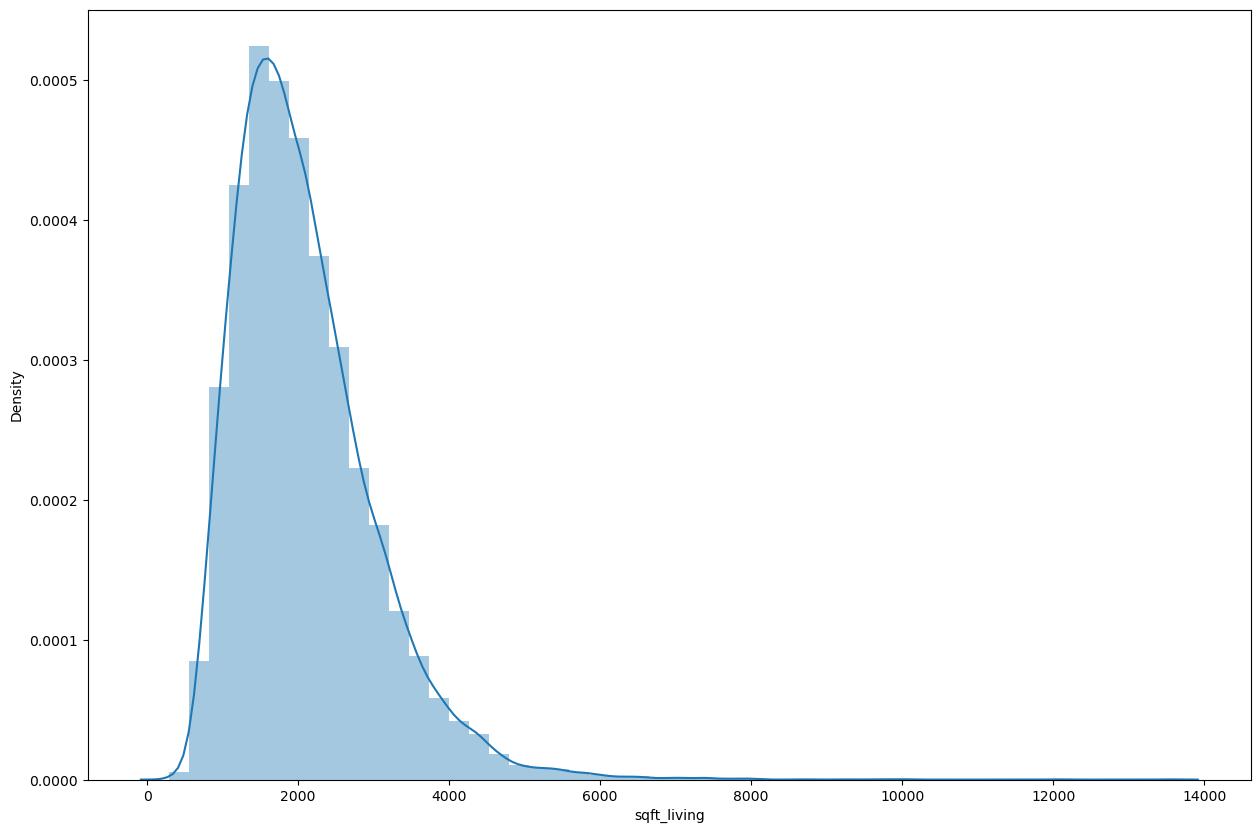

In [55]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
sns.distplot(data['sqft_living'], hist=True, kde=True, rug=False, label='sqft_living', norm_hist=True)

In [57]:
print('Mean', round(data['sqft_living'].mean(), 2))
print('Median', data['sqft_living'].median())
print('Mode', data['sqft_living'].mode()[0])

Mean 2079.9
Median 1910.0
Mode 1300


Gennemsnit (Mean): Det gennemsnitlige beboelsesareal for boligerne er 2079.9 kvadratfod.<br>
Median: Medianen, eller den midterste værdi, for beboelsesarealet er 1910 kvadratfod.<br>
Mode: Den hyppigst forekommende værdi, eller modalværdien, for beboelsesarealet er 1300 kvadratfod.

In [58]:
#Det viser, at der er 138 boliger i datasættet med et beboelsesareal på 1300 kvadratfod.
len(data[data['sqft_living']==1300])

138

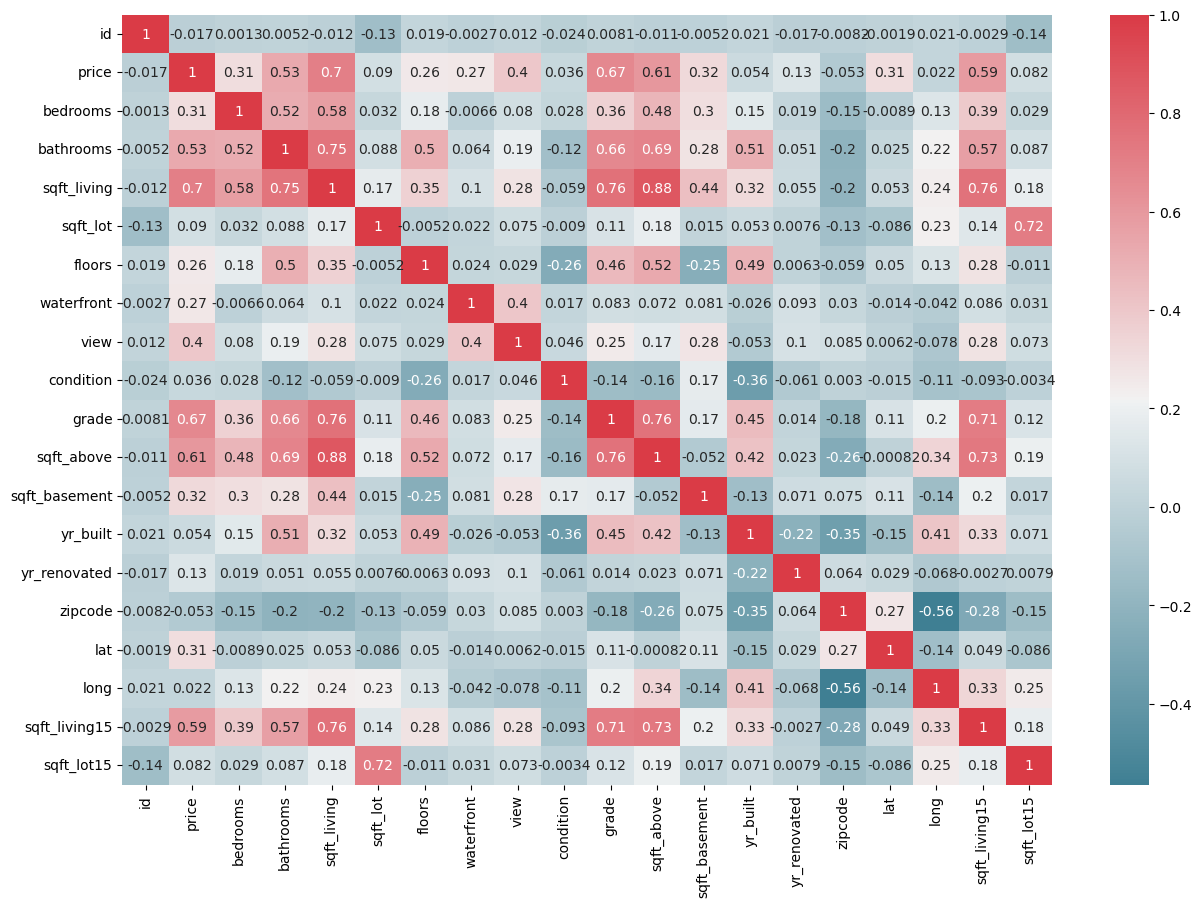

In [66]:
def correlation_heatmap(df1):
    _, ax = plt.subplots(figsize=(15, 10))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(df1.corr(), annot=True, cmap=colormap)

numerical_data = data.select_dtypes(include='number')
correlation_heatmap(numerical_data)


In [67]:
train_data, test_data = train_test_split(data, train_size =0.8, random_state = 3)
reg = linear_model.LinearRegression()
x_train = np.array(train_data['sqft_living']).reshape(-1,1)
y_train = np.array(train_data['price']).reshape(-1, 1)
reg.fit(x_train, y_train)

#evaluate simple model
x_test = np.array(test_data['sqft_living']).reshape(-1, 1)
y_test = np.array(test_data['price']).reshape(-1, 1)
pred = reg.predict(x_test)
print('Simple Model')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(x_train, y_train), 3))
print('R-squared (testing) ', round(reg.score(x_test, y_test), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Simple Model
Mean Squared Error (MSE)  254289.15
R-squared (training)  0.492
R-squared (testing)  0.496
Intercept:  [-47235.8113029]
Coefficient: [[282.2468152]]


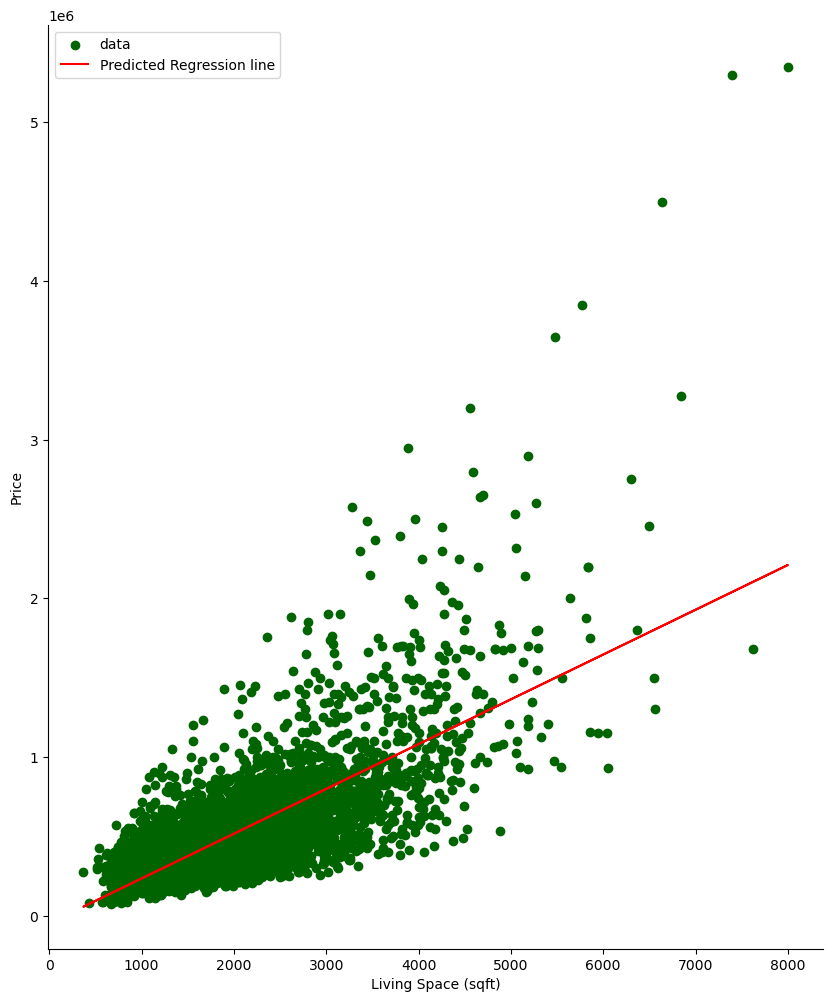

In [70]:
_, ax = plt.subplots(figsize=(10, 12))
plt.scatter(x_test, y_test, color='darkgreen', label='data')
plt.plot(x_test, reg.predict(x_test), color='red', label='Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('Price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


### Complex model 1


Det første subplot viser en boksplot for 'price' opdelt efter 'grade'. Hver boks repræsenterer fordelingen af 'price' for huse med en bestemt 'grade'. Det viser, hvordan 'price' varierer med 'grade'.<br>
Det andet subplot viser en boksplot for 'price' opdelt efter 'bedrooms'. Hver boks repræsenterer fordelingen af 'price' for huse med et bestemt antal soveværelser. Det viser, hvordan 'price' varierer med antallet af soveværelser.<br>
Det tredje subplot viser en boksplot for 'price' opdelt efter 'bathrooms'. Hver boks repræsenterer fordelingen af 'price' for huse med et bestemt antal badeværelser. Det viser, hvordan 'price' varierer med antallet af badeværelser.


<Axes: xlabel='bathrooms', ylabel='price'>

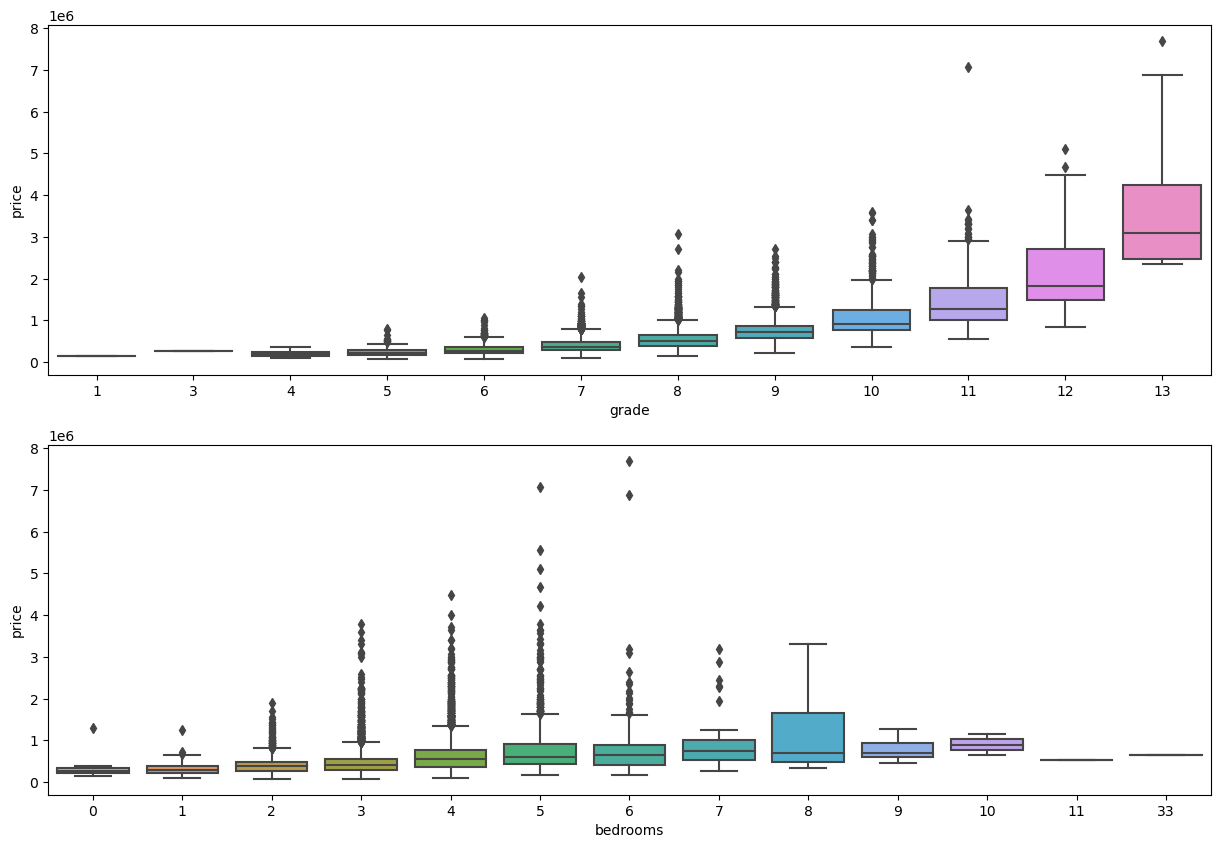

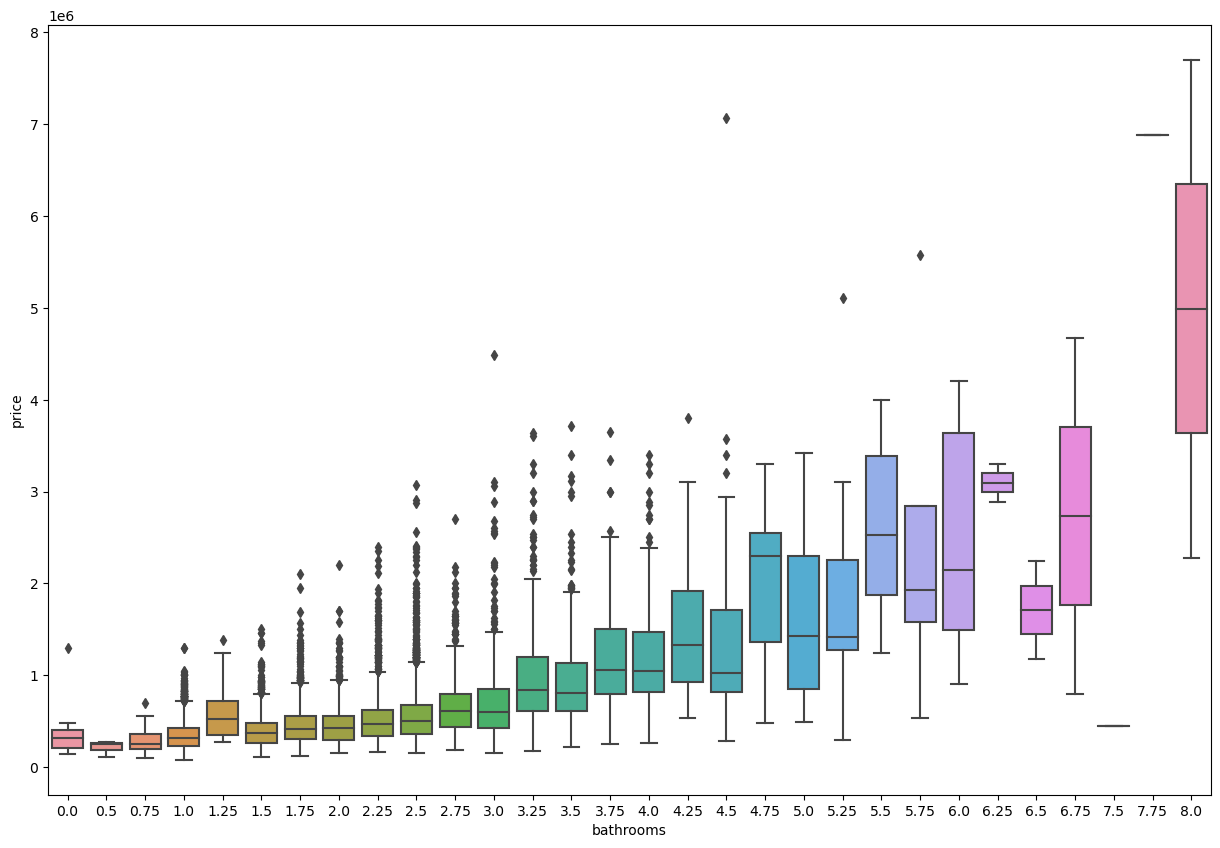

In [71]:
_ , axes = plt.subplots(2, 1, figsize=(15,10))
sns.boxplot(x= train_data['grade'], y=train_data['price'],ax = axes[0])
sns.boxplot(x=train_data['bedrooms'], y=train_data['price'], ax=axes[1])

_ , axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=train_data['bathrooms'], y=train_data['price'])

In [72]:
features1 = ['bathrooms','sqft_living','grade', 'sqft_above']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred = reg.predict(test_data[features1])
print('Complex Model_1')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features1], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features1], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Complex Model_1
Mean Squared Error (MSE)  240664.06
R-squared (training)  0.542
R-squared (testing)  0.549
Intercept:  -651696.69454199
Coefficient: [-3.77792711e+04  2.58159969e+02  1.14837469e+05 -8.06856461e+01]


In [73]:
features1 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred = reg.predict(test_data[features1])
print('Complex Model_2')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features1], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features1], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Complex Model_2
Mean Squared Error (MSE)  205244.56
R-squared (training)  0.655
R-squared (testing)  0.672
Intercept:  -32330182.911675807
Coefficient: [-2.62100082e+04 -3.47626774e+03  1.32069090e+02 -1.31506101e-01
 -3.22608866e+04  5.65731080e+05  6.81843494e+04  8.17559446e+04
  6.62246805e+01  6.58444098e+01  6.71765072e+05  4.60648979e+00]


### Polynomial Regression

In [74]:
polyfeat = PolynomialFeatures(degree =2)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly = linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
predp= poly.predict(xtest_poly)

print('Complex Model_3')
mean_squared_error = metrics.mean_squared_error(test_data['price'], predp)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Complex Model_3
Mean Squared Error (MSE)  175816.7
R-squared (training)  0.758
R-squared (testing)  0.759


In [75]:
polyfeat = PolynomialFeatures(degree =3)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly = linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
predp= poly.predict(xtest_poly)

print('Complex Model_4')
mean_squared_error = metrics.mean_squared_error(test_data['price'], predp)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Complex Model_4
Mean Squared Error (MSE)  202478.48
R-squared (training)  0.776
R-squared (testing)  0.681
